In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras import regularizers
from sklearn.metrics import precision_recall_fscore_support

from keras.regularizers import l1, l2
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.layers import Input
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping
from sklearn.utils import shuffle
from keras.callbacks import History
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv(r'f1dataset1.csv', encoding='utf-8')

In [3]:
# HANDLING NANs
df['laptime'] = np.where(df['laptime'].isna(), 0.0, df['laptime'])
df['race_progress'] = np.where(df['race_progress'].isna(), 0.0, df['race_progress'])
df['tyreageprogress'] = np.where(df['tyreageprogress'].isna(), 0.0, df['tyreageprogress'])

# shuffle data
shuffled_data = df.sample(frac=1, random_state=42)  # Set random_state for reproducibility

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\charm\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you

Epoch 1/10
38/38 [==============================] - 3s 24ms/step - loss: 12.3571 - accuracy: 0.5000 - val_loss: 9.9124 - val_accuracy: 0.9727
Epoch 2/10
38/38 [==============================] - 1s 14ms/step - loss: 8.5949 - accuracy: 0.5000 - val_loss: 6.5297 - val_accuracy: 0.9727
Epoch 3/10
38/38 [==============================] - 1s 14ms/step - loss: 5.5650 - accuracy: 0.5000 - val_loss: 3.9592 - val_accuracy: 0.9727
Epoch 4/10
38/38 [==============================] - 1s 16ms/step - loss: 3.2693 - accuracy: 0.5000 - val_loss: 2.1095 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 12ms/step - loss: 1.7470 - accuracy: 0.5000 - val_loss: 0.9863 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 1s 13ms/step - loss: 0.9528 - accuracy: 0.5152 - val_loss: 0.6934 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 1s 13ms/step - loss: 0.6899 - accuracy: 0.9279 - val_loss: 0.4699 - val_accuracy: 1.0000
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


142/142 [==============================] - 1s 3ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\charm\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you

Epoch 1/10
38/38 [==============================] - 3s 23ms/step - loss: 12.0427 - accuracy: 0.8655 - val_loss: 10.0104 - val_accuracy: 0.9654
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 8.3068 - accuracy: 0.9996 - val_loss: 6.5960 - val_accuracy: 1.0000
Epoch 3/10
38/38 [==============================] - 0s 12ms/step - loss: 5.3355 - accuracy: 0.9460 - val_loss: 4.0223 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 1s 14ms/step - loss: 3.0925 - accuracy: 1.0000 - val_loss: 2.2018 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 1s 17ms/step - loss: 1.6184 - accuracy: 1.0000 - val_loss: 1.1169 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 1s 16ms/step - loss: 0.8852 - accuracy: 0.9427 - val_loss: 0.7125 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 1s 15ms/step - loss: 0.6539 - accuracy: 1.0000 - val_loss: 0.6294 - val_accuracy: 1.0000
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


142/142 [==============================] - 1s 3ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\charm\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you

Epoch 1/10
38/38 [==============================] - 3s 19ms/step - loss: 12.1996 - accuracy: 0.5000 - val_loss: 9.7963 - val_accuracy: 0.9729
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 8.4564 - accuracy: 0.5000 - val_loss: 6.4453 - val_accuracy: 0.9729
Epoch 3/10
38/38 [==============================] - 0s 12ms/step - loss: 5.4666 - accuracy: 0.5000 - val_loss: 3.9052 - val_accuracy: 0.9729
Epoch 4/10
38/38 [==============================] - 0s 11ms/step - loss: 3.1844 - accuracy: 0.5000 - val_loss: 2.0482 - val_accuracy: 0.9729
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 1.6644 - accuracy: 0.5000 - val_loss: 0.9459 - val_accuracy: 0.9729
Epoch 6/10
38/38 [==============================] - 0s 11ms/step - loss: 0.8978 - accuracy: 0.6057 - val_loss: 0.8603 - val_accuracy: 0.5452
Epoch 7/10
38/38 [==============================] - 0s 10ms/step - loss: 0.8030 - accuracy: 0.5177 - val_loss: 0.4977 - val_accuracy: 0.9965
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


142/142 [==============================] - 1s 3ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\charm\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you

Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 12.0166 - accuracy: 0.5000 - val_loss: 9.9048 - val_accuracy: 0.9729
Epoch 2/10
38/38 [==============================] - 0s 10ms/step - loss: 8.3625 - accuracy: 0.5000 - val_loss: 6.5956 - val_accuracy: 0.9729
Epoch 3/10
38/38 [==============================] - 0s 10ms/step - loss: 5.3926 - accuracy: 0.5008 - val_loss: 4.0349 - val_accuracy: 0.9957
Epoch 4/10
38/38 [==============================] - 0s 11ms/step - loss: 3.1972 - accuracy: 0.7881 - val_loss: 2.1999 - val_accuracy: 0.9791
Epoch 5/10
38/38 [==============================] - 0s 10ms/step - loss: 1.7033 - accuracy: 0.9431 - val_loss: 1.0961 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 12ms/step - loss: 0.9480 - accuracy: 0.8951 - val_loss: 0.6930 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 11ms/step - loss: 0.7280 - accuracy: 0.9663 - val_loss: 0.6163 - val_accuracy: 1.0000
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\charm\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you

Epoch 1/10
38/38 [==============================] - 3s 19ms/step - loss: 12.1899 - accuracy: 0.5000 - val_loss: 10.2921 - val_accuracy: 0.0273
Epoch 2/10
38/38 [==============================] - 0s 13ms/step - loss: 8.5085 - accuracy: 0.5004 - val_loss: 6.8766 - val_accuracy: 0.0273
Epoch 3/10
38/38 [==============================] - 0s 12ms/step - loss: 5.4985 - accuracy: 0.7694 - val_loss: 4.2428 - val_accuracy: 0.9992
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 3.2628 - accuracy: 0.9279 - val_loss: 2.3723 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 12ms/step - loss: 1.7473 - accuracy: 0.9869 - val_loss: 1.2328 - val_accuracy: 0.9348
Epoch 6/10
38/38 [==============================] - 0s 13ms/step - loss: 0.9585 - accuracy: 0.9734 - val_loss: 0.7750 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 10ms/step - loss: 0.7374 - accuracy: 0.9819 - val_loss: 0.6878 - val_accuracy: 1.0000
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


142/142 [==============================] - 1s 3ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\charm\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you

Epoch 1/10
38/38 [==============================] - 3s 19ms/step - loss: 12.1743 - accuracy: 0.5000 - val_loss: 10.0324 - val_accuracy: 0.9727
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 8.5175 - accuracy: 0.5000 - val_loss: 6.6869 - val_accuracy: 0.9727
Epoch 3/10
38/38 [==============================] - 0s 11ms/step - loss: 5.5117 - accuracy: 0.5000 - val_loss: 4.1125 - val_accuracy: 0.9727
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 3.3113 - accuracy: 0.5000 - val_loss: 2.2810 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 10ms/step - loss: 1.7865 - accuracy: 0.5000 - val_loss: 1.2176 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 10ms/step - loss: 0.9869 - accuracy: 0.5000 - val_loss: 0.7612 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 11ms/step - loss: 0.7675 - accuracy: 0.5000 - val_loss: 0.6633 - val_accuracy: 0.9727
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


142/142 [==============================] - 1s 3ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\charm\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you

Epoch 1/10
38/38 [==============================] - 3s 19ms/step - loss: 12.1936 - accuracy: 0.5000 - val_loss: 10.3983 - val_accuracy: 0.0273
Epoch 2/10
38/38 [==============================] - 0s 10ms/step - loss: 8.4775 - accuracy: 0.5000 - val_loss: 7.1704 - val_accuracy: 0.0273
Epoch 3/10
38/38 [==============================] - 0s 12ms/step - loss: 5.4785 - accuracy: 0.5000 - val_loss: 4.3792 - val_accuracy: 0.0273
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 3.2258 - accuracy: 0.5000 - val_loss: 2.4920 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 10ms/step - loss: 1.7277 - accuracy: 0.5038 - val_loss: 1.3250 - val_accuracy: 0.6823
Epoch 6/10
38/38 [==============================] - 0s 10ms/step - loss: 0.8986 - accuracy: 0.9730 - val_loss: 0.8760 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 12ms/step - loss: 0.6710 - accuracy: 1.0000 - val_loss: 0.7700 - val_accuracy: 1.0000
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\charm\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you

Epoch 1/10
38/38 [==============================] - 3s 20ms/step - loss: 12.2733 - accuracy: 0.5000 - val_loss: 10.5144 - val_accuracy: 0.0273
Epoch 2/10
38/38 [==============================] - 0s 10ms/step - loss: 8.5925 - accuracy: 0.5000 - val_loss: 7.0828 - val_accuracy: 0.0273
Epoch 3/10
38/38 [==============================] - 0s 11ms/step - loss: 5.5591 - accuracy: 0.5000 - val_loss: 4.3974 - val_accuracy: 0.0273
Epoch 4/10
38/38 [==============================] - 0s 11ms/step - loss: 3.2910 - accuracy: 0.5000 - val_loss: 2.4874 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 10ms/step - loss: 1.7661 - accuracy: 0.5000 - val_loss: 1.3323 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 11ms/step - loss: 0.9818 - accuracy: 0.5000 - val_loss: 0.9105 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 11ms/step - loss: 0.7697 - accuracy: 0.5000 - val_loss: 0.7901 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\charm\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you

Epoch 1/10
38/38 [==============================] - 3s 19ms/step - loss: 12.2061 - accuracy: 0.7032 - val_loss: 10.1346 - val_accuracy: 0.9888
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 8.5294 - accuracy: 0.9747 - val_loss: 6.7854 - val_accuracy: 1.0000
Epoch 3/10
38/38 [==============================] - 0s 11ms/step - loss: 5.5164 - accuracy: 1.0000 - val_loss: 4.1619 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 12ms/step - loss: 3.2664 - accuracy: 0.9473 - val_loss: 2.3723 - val_accuracy: 0.9336
Epoch 5/10
38/38 [==============================] - 0s 11ms/step - loss: 1.7463 - accuracy: 0.9562 - val_loss: 1.2337 - val_accuracy: 0.9634
Epoch 6/10
38/38 [==============================] - 0s 12ms/step - loss: 0.9399 - accuracy: 0.9979 - val_loss: 0.7338 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 12ms/step - loss: 0.7334 - accuracy: 0.9414 - val_loss: 0.6500 - val_accuracy: 1.0000
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


142/142 [==============================] - 1s 3ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\charm\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you

Epoch 1/10
38/38 [==============================] - 3s 21ms/step - loss: 12.0345 - accuracy: 0.6859 - val_loss: 10.0640 - val_accuracy: 0.9524
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 8.3337 - accuracy: 0.9975 - val_loss: 6.6763 - val_accuracy: 1.0000
Epoch 3/10
38/38 [==============================] - 0s 12ms/step - loss: 5.3442 - accuracy: 0.9903 - val_loss: 4.1667 - val_accuracy: 0.7853
Epoch 4/10
38/38 [==============================] - 0s 11ms/step - loss: 3.1475 - accuracy: 0.9452 - val_loss: 2.2482 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 12ms/step - loss: 1.6344 - accuracy: 1.0000 - val_loss: 1.1367 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 11ms/step - loss: 0.8641 - accuracy: 1.0000 - val_loss: 0.7172 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 11ms/step - loss: 0.6443 - accuracy: 0.9903 - val_loss: 0.6805 - val_accuracy: 0.8642
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


142/142 [==============================] - 1s 3ms/step
Average Test Accuracy: 0.7326183104820876
Average Test Precision: 0.7087480672023219
Average Test Recall: 0.9873015873015873
Average Test F1-Score: 0.7169772525376311


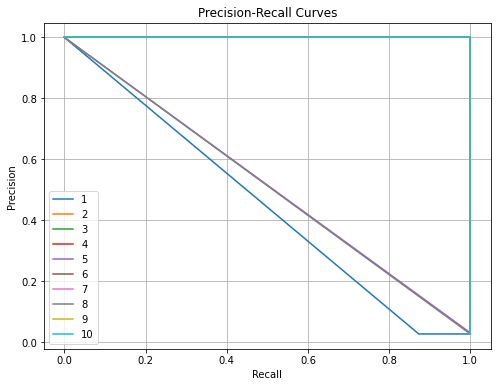

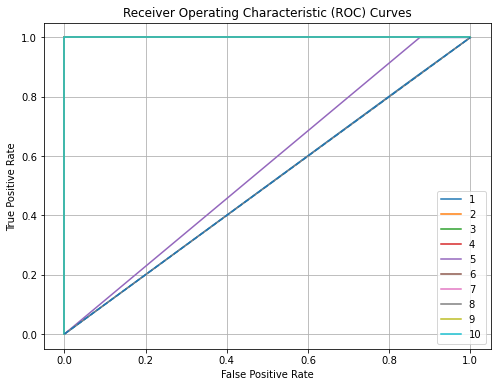

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

# Set the seed value
np.random.seed(42)

# Separate test races
test_races = shuffled_data['race_id'].unique()[:10]  # 10 test races
excluded_races = test_races.tolist()

# Exclude test races from the dataset
train_data = shuffled_data[~shuffled_data['race_id'].isin(test_races)]
test_data = shuffled_data[shuffled_data['race_id'].isin(test_races)]

# Define the number of folds for cross-validation
n_folds = 10

# Initialize StratifiedKFold with the desired number of folds
stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation results
test_accuracy_scores = []
test_precision_scores = []
test_recall_scores = []
test_f1_scores = []
precision_scores_all_folds = []
recall_scores_all_folds = []
fpr_scores_all_folds = []
tpr_scores_all_folds = []
thresholds_all_folds = []


# Iterate over the folds
for train_index, val_index in stratified_kfold.split(train_data, train_data['pitstop']):
   # Get the training and validation subsets for the current fold
    train_subset = train_data.iloc[train_index]
    val_subset = train_data.iloc[val_index]

    # Separate input features (X) and target variable (y)
    X_train = train_subset[['race_progress', 'tyreageprogress', 'is_leader', 'relativecompound', 'racetrackcat', 'fcystatus', 'remaining_pit_stops', 'pursuer_tyre_change', 'close_ahead']]
    y_train = train_subset['pitstop']

    X_val = val_subset[['race_progress', 'tyreageprogress', 'is_leader', 'relativecompound', 'racetrackcat', 'fcystatus', 'remaining_pit_stops', 'pursuer_tyre_change', 'close_ahead']]
    y_val = val_subset['pitstop']

    # Separate categorical and numerical features
    cat_features = ['is_leader', 'relativecompound', 'racetrackcat', 'fcystatus', 'remaining_pit_stops', 'pursuer_tyre_change', 'close_ahead']
    num_features = ['race_progress', 'tyreageprogress']

    # Perform preprocessing on numerical features
    scaler = StandardScaler()
    X_train[num_features] = scaler.fit_transform(X_train[num_features])
    X_val[num_features] = scaler.transform(X_val[num_features])

    # Perform preprocessing on categorical features
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    X_train_encoded = encoder.fit_transform(X_train[cat_features])
    X_val_encoded = encoder.transform(X_val[cat_features])

    # Combine preprocessed numerical and categorical features
    X_train_processed = np.concatenate((X_train_encoded, X_train[num_features]), axis=1)
    X_val_processed = np.concatenate((X_val_encoded, X_val[num_features]), axis=1)

    # Undersample the majority class
    majority_class_indices = np.where(y_train == 0)[0]
    minority_class_indices = np.where(y_train == 1)[0]
    undersampled_majority_indices = np.random.choice(majority_class_indices, size=len(minority_class_indices), replace=False)
    undersampled_indices = np.concatenate((undersampled_majority_indices, minority_class_indices))
    np.random.shuffle(undersampled_indices)

    # Use the undersampled indices to obtain the balanced training subset
    X_train_processed_undersampled = X_train_processed[undersampled_indices]
    y_train_undersampled = y_train.iloc[undersampled_indices]

    # Create an instance of LabelEncoder
    label_encoder = LabelEncoder()

    # Encode the target variable
    y_train_encoded_undersampled = label_encoder.fit_transform(y_train_undersampled)

    # Convert the target variable to categorical
    y_train_categorical = to_categorical(y_train_encoded_undersampled)

    # Reshape the training data for the RNN model
    X_train_reshaped = X_train_processed_undersampled.reshape((-1, X_train_processed_undersampled.shape[1], 1))

    # Build the FFNN model with L1 and L2 regularization
    ffnn_model = tf.keras.models.Sequential()
    ffnn_model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_processed_undersampled.shape[1],),
                                         kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.001)))
    ffnn_model.add(tf.keras.layers.Dropout(0.2))
    ffnn_model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.001)))
    ffnn_model.add(tf.keras.layers.Dropout(0.2))
    ffnn_model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.001)))
    ffnn_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Build the RNN model with L1 and L2 regularization
    rnn_model = tf.keras.models.Sequential()
    rnn_model.add(tf.keras.layers.SimpleRNN(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]),
                                            kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.001)))
    rnn_model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.001)))
    rnn_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Build the combined model with L1 and L2 regularization
    combined_model_input = Input(shape=(X_train_processed_undersampled.shape[1],))
    ffnn_output = ffnn_model(combined_model_input)
    rnn_input = tf.keras.layers.Reshape((X_train_reshaped.shape[1], X_train_reshaped.shape[2]))(combined_model_input)
    rnn_output = rnn_model(rnn_input)
    combined_output = tf.keras.layers.concatenate([ffnn_output, rnn_output])
    combined_output = tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.001))(combined_output)

    # Create the combined model
    combined_model = Model(inputs=combined_model_input, outputs=combined_output)


    # Compile the combined model
    combined_model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

    # Define early stopping
    early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

    # Train the combined model
    history = combined_model.fit(X_train_processed_undersampled, y_train_encoded_undersampled, epochs=10, batch_size=32, validation_data=(X_val_processed, y_val), callbacks=[early_stopping])

    # Evaluate the combined model on the test data
    X_test = test_data[['race_progress', 'tyreageprogress', 'is_leader', 'relativecompound', 'racetrackcat', 'fcystatus', 'remaining_pit_stops', 'pursuer_tyre_change', 'close_ahead']]
    y_test = test_data['pitstop']

    X_test[num_features] = scaler.transform(X_test[num_features])
    X_test_encoded = encoder.transform(X_test[cat_features])
    X_test_processed = np.concatenate((X_test_encoded, X_test[num_features]), axis=1)
    
    # Evaluate the combined model on the test data
    test_predictions = combined_model.predict(X_test_processed)
    test_predictions = np.round(test_predictions).astype(int)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions, zero_division=0)
    test_recall = recall_score(y_test, test_predictions)
    test_f1 = f1_score(y_test, test_predictions)

    # Append evaluation scores to the lists
    test_accuracy_scores.append(test_accuracy)
    test_precision_scores.append(test_precision)
    test_recall_scores.append(test_recall)
    test_f1_scores.append(test_f1)

    # Calculate precision and recall for the current fold
    precision, recall, _ = precision_recall_curve(y_test, test_predictions)
    precision_scores_all_folds.append(precision)
    recall_scores_all_folds.append(recall)
    
    # Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, test_predictions)

    # Append the ROC curve data to the lists
    fpr_scores_all_folds.append(fpr)
    tpr_scores_all_folds.append(tpr)
    thresholds_all_folds.append(thresholds)

# Compute the average evaluation scores across all folds
average_test_accuracy = np.mean(test_accuracy_scores)
average_test_precision = np.mean(test_precision_scores)
average_test_recall = np.mean(test_recall_scores)
average_test_f1 = np.mean(test_f1_scores)

# Print the average evaluation scores
print("Average Test Accuracy:", average_test_accuracy)
print("Average Test Precision:", average_test_precision)
print("Average Test Recall:", average_test_recall)
print("Average Test F1-Score:", average_test_f1)

# Plot precision and recall curves for all folds on one plot
plt.figure(figsize=(8, 6))
for precision_fold, recall_fold in zip(precision_scores_all_folds, recall_scores_all_folds):
    plt.plot(recall_fold, precision_fold)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(range(1, n_folds+1))
plt.grid(True)
plt.show()

# Plot ROC curves for all folds on one plot
plt.figure(figsize=(8, 6))
for fpr_fold, tpr_fold in zip(fpr_scores_all_folds, tpr_scores_all_folds):
    plt.plot(fpr_fold, tpr_fold)
plt.plot([0, 1], [0, 1], linestyle='--')  # Plot diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(range(1, n_folds+1))
plt.grid(True)
plt.show()